# IBM HR Analytics Employee Attrition & Performance

## Dataset

The original dataset contains 35 columns and 1470 rows on mock employee data, and is available on [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset). The data encompasses a multitude of employee attributes, including age, attrition status, frequency of business travel, daily rate, department, distance from home, level of education attained, job role, and job satisfaction. We are interested in what factors contribute to employee attrition, how we can predict attrition, and what we can do to improve employee retention.

## Data Preprocessing

We first need to import the required libraries and load the data. We will also drop the `EmployeeCount`, `EmployeeNumber`, `Over18`, and `StandardHours` columns, as they do not provide any useful information.

In [6]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load the dataset
df = pd.read_csv('employee_attrition.csv')
# Display the first 5 rows of data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
# Display the descriptive statistics for the dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
# Drop columns that do not provide helpful information
# 'EmployeeCount', 'Over18', 'StandardHours' all have one value
# 'EmployeeNumber' does not provide helpful info
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18',
        'StandardHours'], axis="columns", inplace=True)
# Display the new first 5 rows of data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [13]:
# Count the number of employees who left vs stayed
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [14]:
# Convert 'Attrition' to binary equivalent
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

## Data Visualization

We will produce 4 graphics using the `matplotlib` and `seaborn` libraries to visualize the data and gain insights into the factors and trends that contribute to employee attrition.

### Attrition Rate by Monthly Income & Job Role



In [15]:
# Group by 'JobRole' and calculate the attrition rate for each group
attrition_by_job_role = df.groupby('JobRole')['Attrition'].mean().reset_index()
attrition_by_job_role = attrition_by_job_role.sort_values(
    by='Attrition', ascending=False)

# Display the first 5 rows of attrition rate by job role
attrition_by_job_role.head()

,JobRole,Attrition
8,Sales Representative,0.397590
2,Laboratory Technician,0.239382
1,Human Resources,0.230769
7,Sales Executive,0.174847
6,Research Scientist,0.160959


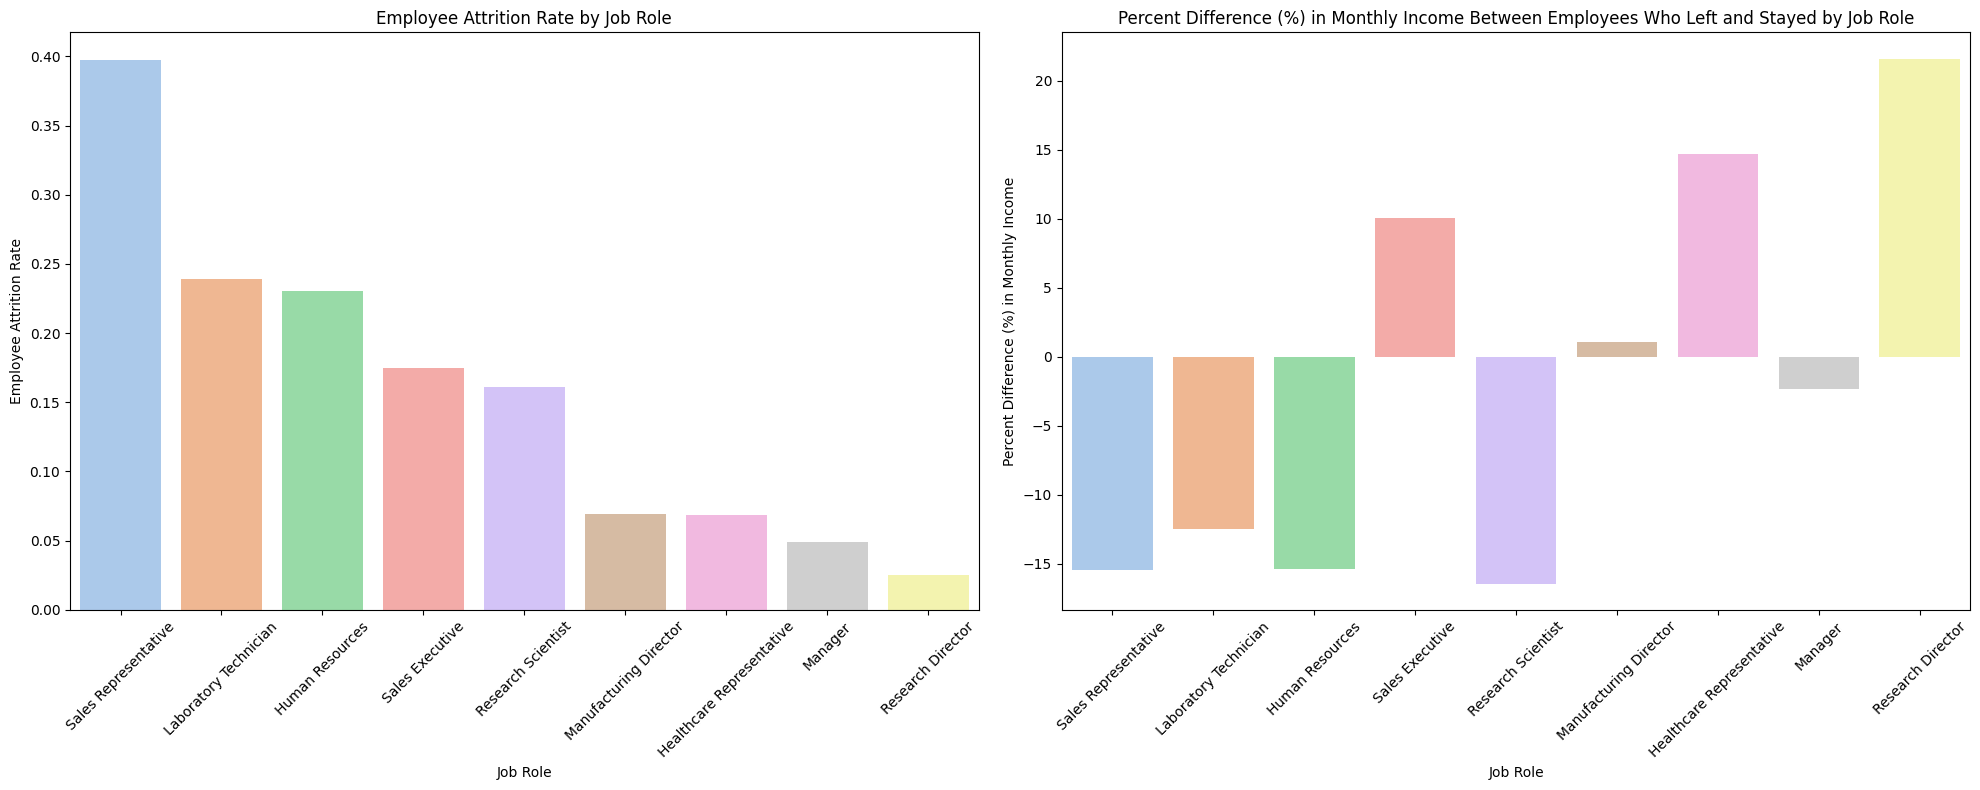

In [16]:
# Calculate the percent difference in income between employees who left and stayed
income_diff = df.groupby(['JobRole', 'Attrition'])[
    'MonthlyIncome'].mean().unstack()
income_diff['Percent Difference'] = (
    (income_diff[1] - income_diff[0]) / income_diff[0]) * 100

# Align the sorting of income_diff with attrition_by_job_role
income_diff = income_diff.reindex(attrition_by_job_role['JobRole'])

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
palette = sns.color_palette("pastel", len(attrition_by_job_role['JobRole']))
color_map = dict(zip(attrition_by_job_role['JobRole'], palette))

# Plot the attrition rate by job role
sns.barplot(y='Attrition', x='JobRole', data=attrition_by_job_role,
            ax=axes[0], hue='JobRole', palette=color_map, dodge=False)
axes[0].set_ylabel('Employee Attrition Rate')
axes[0].set_xlabel('Job Role')
axes[0].set_title('Employee Attrition Rate by Job Role')
axes[0].set_xticks(range(len(attrition_by_job_role['JobRole'])))
axes[0].set_xticklabels(attrition_by_job_role['JobRole'], rotation=45)

# Plot the percent difference in income
sns.barplot(x=income_diff.index, y=income_diff['Percent Difference'],
            ax=axes[1], hue=income_diff.index, palette=color_map, dodge=False)
axes[1].set_xlabel('Job Role')
axes[1].set_ylabel('Percent Difference (%) in Monthly Income')
axes[1].set_title(
    'Percent Difference (%) in Monthly Income Between Employees Who Left and Stayed by Job Role')
axes[1].set_xticks(range(len(income_diff.index)))
axes[1].set_xticklabels(income_diff.index, rotation=45)

plt.tight_layout()
plt.show()

### Attrition Rate by Distance from Home



In [17]:
# Group by 'DistanceFromHome' and calculate the attrition rate for each group
attrition_by_distance = df.groupby('DistanceFromHome')[
    'Attrition'].mean().reset_index()
# Display the first 5 rows of attrition rate by distance
attrition_by_distance.head()

,DistanceFromHome,Attrition
0,1,0.125000
1,2,0.132701
2,3,0.166667
3,4,0.140625
4,5,0.153846


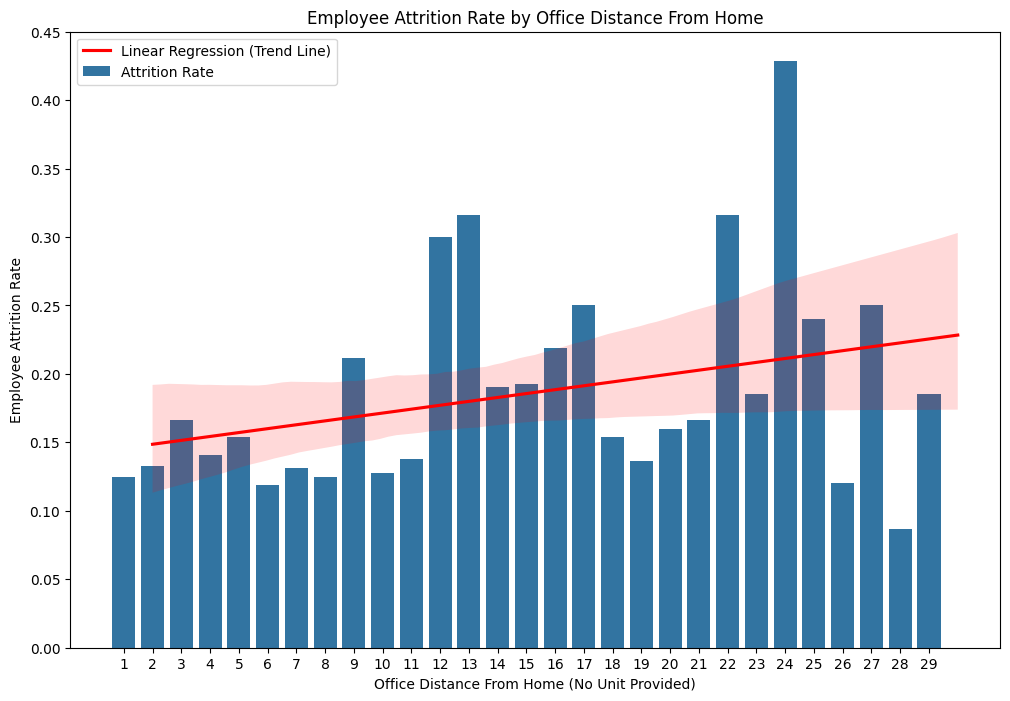

In [18]:
# Plot the attrition rate by distance from home with a trend line on a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='DistanceFromHome', y='Attrition',
            data=attrition_by_distance, label='Attrition Rate')
sns.regplot(x='DistanceFromHome', y='Attrition', data=attrition_by_distance,
            scatter=False, color='red', label='Linear Regression (Trend Line)')
plt.xlabel('Office Distance From Home (No Unit Provided)')
plt.ylabel('Employee Attrition Rate')
plt.title('Employee Attrition Rate by Office Distance From Home')
plt.legend()
plt.show()

### Attrition Rate by Satisfaction / Performance Metrics



In [19]:
# Group by satisfaction / performance metrics and calculate the attrition rate for each group
satisfaction_metrics = ['EnvironmentSatisfaction', 'JobSatisfaction',
                        'RelationshipSatisfaction', 'JobInvolvement', 'PerformanceRating', 'WorkLifeBalance']
attrition_by_metrics = df.groupby(satisfaction_metrics)[
    'Attrition'].mean().reset_index()
# Display the first 5 rows of attrition rate by satisfaction / performance metrics
attrition_by_metrics.head()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,JobInvolvement,PerformanceRating,WorkLifeBalance,Attrition
0,1,1,1,2,3,1,1.000000
1,1,1,1,2,3,2,0.000000
2,1,1,1,2,3,3,0.333333
3,1,1,1,2,4,3,1.000000
4,1,1,1,3,3,2,0.000000


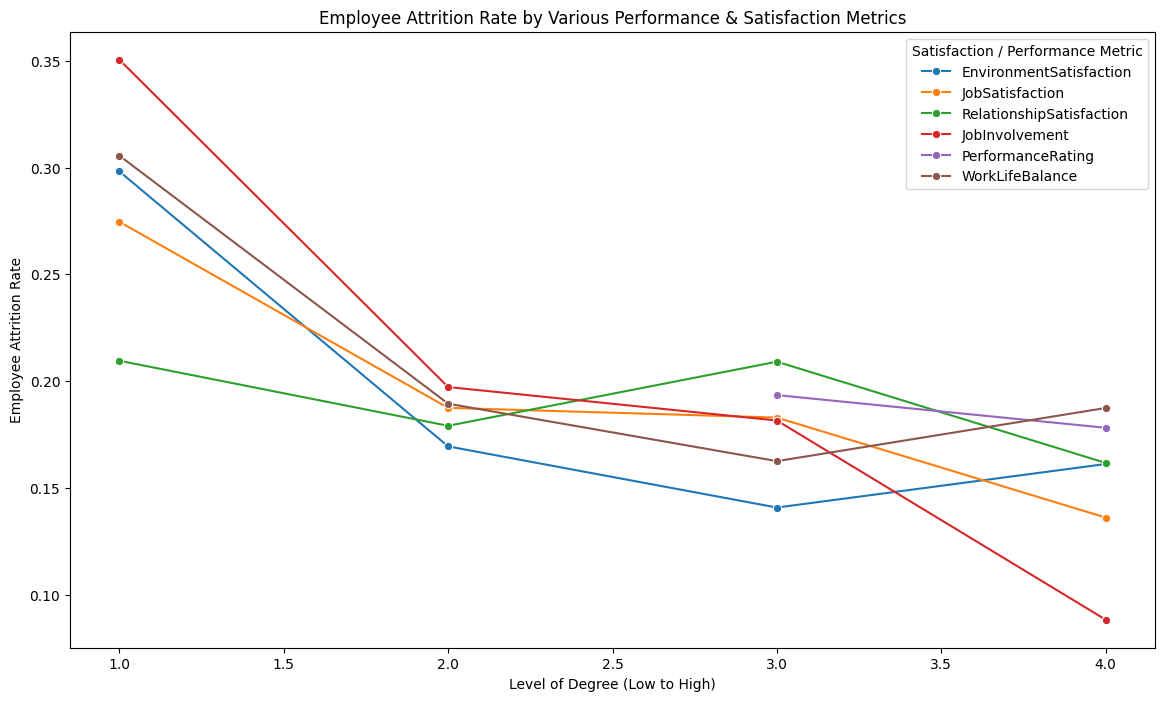

In [20]:
# Melt the data to have metrics in a single column
melted_attrition_rates = attrition_by_metrics.melt(
    id_vars='Attrition', value_vars=satisfaction_metrics, var_name='SatisfactionMetric', value_name='SatisfactionLevel')

# Plot the attrition rate by satisfaction / performance metric
plt.figure(figsize=(14, 8))
sns.lineplot(x='SatisfactionLevel', y='Attrition',
             hue='SatisfactionMetric', data=melted_attrition_rates, marker='o', errorbar=None)
plt.xlabel('Level of Degree (Low to High)')
plt.ylabel('Employee Attrition Rate')
plt.title('Employee Attrition Rate by Various Performance & Satisfaction Metrics')
plt.legend(title='Satisfaction / Performance Metric')
plt.show()

### Attrition Rate by Business Travel Frequency & Educational Field



In [21]:
# Group by 'BusinessTravel' and 'EducationField' and calculate the attrition rate for each group
attrition_by_travel_education = df.groupby(['BusinessTravel', 'EducationField'])[
    'Attrition'].mean().reset_index()
# Display the first 5 rows of attrition rate by business travel frequency and education field
attrition_by_travel_education.head()

,BusinessTravel,EducationField,Attrition
0,Non-Travel,Human Resources,0.000000
1,Non-Travel,Life Sciences,0.063492
2,Non-Travel,Marketing,0.083333
3,Non-Travel,Medical,0.080000
4,Non-Travel,Other,0.142857


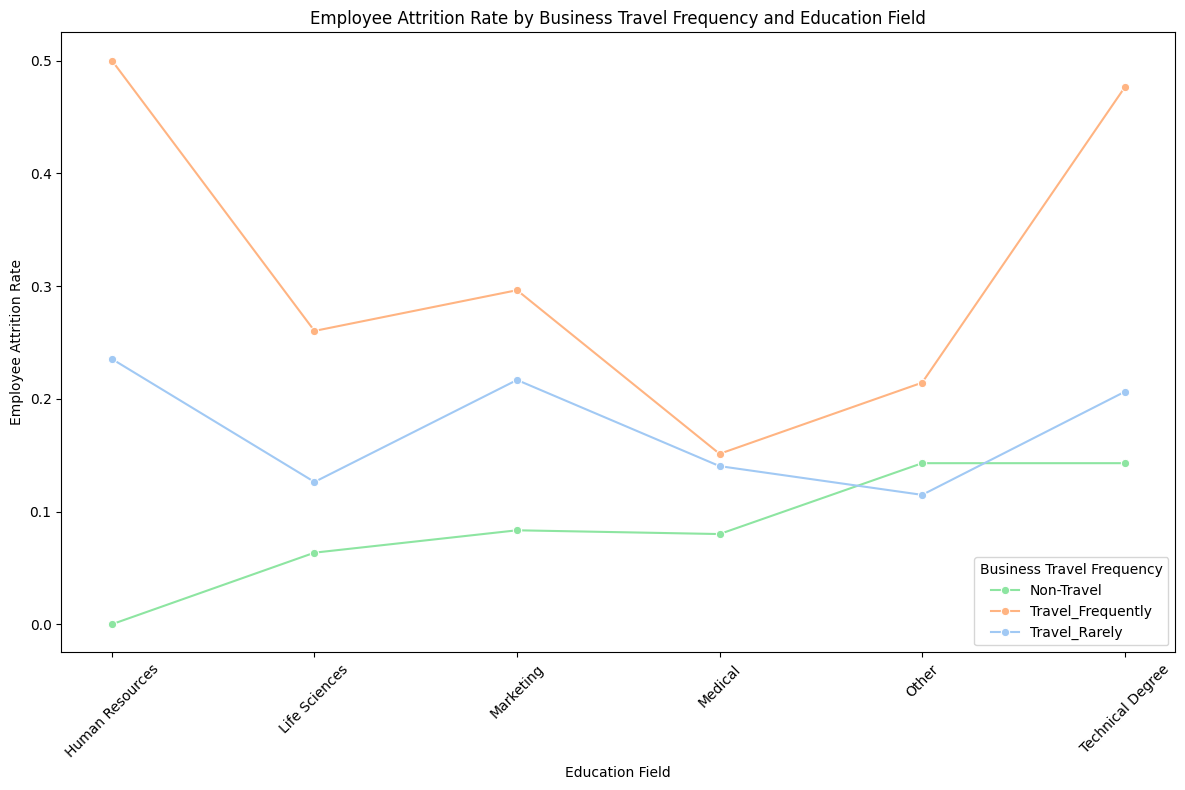

In [23]:
# Plot the attrition rate by business travel frequency and education field
plt.figure(figsize=(12, 8))
palette = sns.color_palette("pastel", len(df['BusinessTravel'].unique()))
color_map = dict(zip(df['BusinessTravel'].unique(), palette))
sns.lineplot(x='EducationField', y='Attrition', data=attrition_by_travel_education,
             hue='BusinessTravel', palette=color_map, marker='o')
plt.xlabel('Education Field')
plt.ylabel('Employee Attrition Rate')
plt.title('Employee Attrition Rate by Business Travel Frequency and Education Field')
plt.legend(title='Business Travel Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()